In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2019-01-03"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-01-03   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675   Ìï¥Ïö¥ÎåÄÍµ¨   8472   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2019-01-03     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2019-01-03    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3052   Ìï¥Ïö¥ÎåÄÍµ¨   3475   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2019-01-03     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2250   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2019-01-03    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6380   Ìï¥Ïö¥ÎåÄÍµ¨   8487   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2019-01-03     ÎåÄÌåå                      1.0„éè   3365   Ìï¥Ïö¥ÎåÄÍµ¨   4344   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2019-01-03   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7900   Ìï¥Ïö¥ÎåÄÍµ¨  12250   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2019-01-03     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4188   Ìï¥Ïö¥ÎåÄÍµ¨   4632   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2019-01-03     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2019-01-03     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2019-01-03      Î¨¥                   2.0„éè 1Í∞ú   1121   Ìï¥Ïö¥ÎåÄÍµ¨   2316   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2019-01-03    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2019-01-03     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3300   Ìï¥Ïö¥ÎåÄÍµ¨   4996   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2019-01-03      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  16009   Ìï¥Ïö¥ÎåÄÍµ¨  39146   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2019-01-03     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1578   Ìï¥Ïö¥ÎåÄÍµ¨   2480   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2019-01-03  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3115   Ìï¥Ïö¥ÎåÄÍµ¨   3733   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2019-01-03   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  13900   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2019-01-03     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  10312   Ìï¥Ïö¥ÎåÄÍµ¨  26405   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2019-01-03    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2019-01-03     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1680   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2019-01-03     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2019-01-03    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29950   Ìï¥Ïö¥ÎåÄÍµ¨  44950   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2019-01-03    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   3980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2019-01-03      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  51990   Ìï¥Ïö¥ÎåÄÍµ¨  54900   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2019-01-03     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1078   Ìï¥Ïö¥ÎåÄÍµ¨   1457   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2019-01-03     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2019-01-03    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2019-01-03   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2019-01-03     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2480   Ìï¥Ïö¥ÎåÄÍµ¨   3456   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2019-01-03    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12642   Ìï¥Ïö¥ÎåÄÍµ¨  25700   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1797   26.92%   7,774  
1     950   15.08%   6,633  
2     423   13.86%   3,240  
3     440   19.56%   2,507  
4    2107   33.03%   7,082  
5     979   29.09%   3,941  
6    4350   55.06%   9,467  
7     444    10.6%   4,395  
8       0     0.0%     676  
9      10    0.71%   1,407  
10   1195   106.6%   1,886  
11    436   14.16%   3,295  
12   1696   51.39%   4,029  
13  23137  144.52%  29,459  
14    902   57.16%   2,072  
15    618   19.84%   3,449  
16    400    2.96%

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2019-04-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-04-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨   8175   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2019-04-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2019-04-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2380   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2019-04-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4095   Ìï¥Ïö¥ÎåÄÍµ¨   8112   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2019-04-04     ÎåÄÌåå                      1.0„éè    936   Ìï¥Ïö¥ÎåÄÍµ¨   2300   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2019-04-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6400   Ìï¥Ïö¥ÎåÄÍµ¨  14250   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2019-04-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3206   Ìï¥Ïö¥ÎåÄÍµ¨   4879   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2019-04-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2019-04-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2019-04-04      Î¨¥                   2.0„éè 1Í∞ú   1114   Ìï¥Ïö¥ÎåÄÍµ¨   2150   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2019-04-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2019-04-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  20817   Ìï¥Ïö¥ÎåÄÍµ¨  46000   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2019-04-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1944   Ìï¥Ïö¥ÎåÄÍµ¨   2480   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2019-04-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3115   Ìï¥Ïö¥ÎåÄÍµ¨   3733   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2019-04-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900   Ìï¥Ïö¥ÎåÄÍµ¨  13800   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2019-04-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9458   Ìï¥Ïö¥ÎåÄÍµ¨  26605   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2019-04-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2019-04-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Ìï¥Ïö¥ÎåÄÍµ¨   1680   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2019-04-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2019-04-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  32900   Ìï¥Ïö¥ÎåÄÍµ¨  47450   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2019-04-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2019-04-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  51990   Ìï¥Ïö¥ÎåÄÍµ¨  54900   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2019-04-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1267   Ìï¥Ïö¥ÎåÄÍµ¨   1817   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2019-04-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2019-04-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2019-04-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2019-04-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3130   Ìï¥Ïö¥ÎåÄÍµ¨   3576   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2019-04-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12642   Ìï¥Ïö¥ÎåÄÍµ¨  24700   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750    10.1%   7,754  
1     950   15.08%   6,633  
2     310   13.03%   2,540  
3    4017    98.1%   6,062  
4    1364  145.73%   1,797  
5    7850  122.66%   9,683  
6    1673   52.18%   4,132  
7       0     0.0%     676  
8      10    0.71%   1,407  
9    1036    93.0%   1,744  
10    436   14.16%   3,295  
11  25183  120.97%  33,280  
12    536   27.57%   2,166  
13    618   19.84%   3,449  
14   2900   26.61%  12,733  
15  17147   181.3%  17,149  
16    874   48.13%   2,319  
17     50    3.07%   1,663  
18      0     0.0%   1,190  
19  14550   44.22%  38,433  
20   1820   30.43%   6,910  
21   2910     5.6%  53,897  
22    550   43.41%   1,569  
23      4     0.5%     799  
24

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2019-07-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-07-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5962   Ìï¥Ïö¥ÎåÄÍµ¨   7425   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2019-07-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2019-07-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2580   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2019-07-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4952   Ìï¥Ïö¥ÎåÄÍµ¨   7487   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2019-07-04     ÎåÄÌåå                      1.0„éè   2200   Ìï¥Ïö¥ÎåÄÍµ¨   3069   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2019-07-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8900   Ìï¥Ïö¥ÎåÄÍµ¨  14450   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2019-07-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4310   Ìï¥Ïö¥ÎåÄÍµ¨   4879   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2019-07-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2019-07-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2019-07-04      Î¨¥                   2.0„éè 1Í∞ú   1295   Ìï¥Ïö¥ÎåÄÍµ¨   2483   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2019-07-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2019-07-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9875   Ìï¥Ïö¥ÎåÄÍµ¨  17487   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2019-07-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22419   Ìï¥Ïö¥ÎåÄÍµ¨  45947   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2019-07-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2075   Ìï¥Ïö¥ÎåÄÍµ¨   2980   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2019-07-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3115   Ìï¥Ïö¥ÎåÄÍµ¨   3900   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2019-07-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  13990   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2019-07-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12537   Ìï¥Ïö¥ÎåÄÍµ¨  26605   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2019-07-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1799   Ìï¥Ïö¥ÎåÄÍµ¨   2690   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2019-07-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Ìï¥Ïö¥ÎåÄÍµ¨   1680   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2019-07-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2019-07-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  32900   Ìï¥Ïö¥ÎåÄÍµ¨  43950   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2019-07-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2019-07-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49990   Ìï¥Ïö¥ÎåÄÍµ¨  54900   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2019-07-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1036   Ìï¥Ïö¥ÎåÄÍµ¨   1890   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2019-07-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2019-07-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7290   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2019-07-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2019-07-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490   Ìï¥Ïö¥ÎåÄÍµ¨   3576   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2019-07-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13151   Ìï¥Ïö¥ÎåÄÍµ¨  25822   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1463   24.54%   6,937  
1     950   15.08%   6,633  
2     110    4.26%   2,623  
3    2535   51.19%   5,996  
4     869    39.5%   2,668  
5    5550   62.36%  10,917  
6     569    13.2%   4,573  
7       0     0.0%     676  
8      10    0.71%   1,407  
9    1188   91.74%   1,719  
10    436   14.16%   3,295  
11   7612   77.08%  12,644  
12  23528  104.95%  35,034  
13    905   43.61%   2,600  
14    785    25.2%   3,583  
15    490    3.63%  13,763  
16  14068  112.21%  18,881  
17    891   49.53%   2,313  
18     50    3.07%   1,647  
19      0     0.0%   1,190  
20  11050   3

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2019-10-10"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-10-10   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨   8175   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2019-10-10     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6350   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2019-10-10     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11216   Ìï¥Ïö¥ÎåÄÍµ¨  18670   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2019-10-10    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3240   Ìï¥Ïö¥ÎåÄÍµ¨   3571   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2019-10-10     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680   Ìï¥Ïö¥ÎåÄÍµ¨   2700   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2019-10-10    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4714   Ìï¥Ïö¥ÎåÄÍµ¨   5700   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2019-10-10     ÎåÄÌåå                      1.0„éè   2758   Ìï¥Ïö¥ÎåÄÍµ¨   3425   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2019-10-10   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8400   Ìï¥Ïö¥ÎåÄÍµ¨   9900   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2019-10-10     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   2828   Ìï¥Ïö¥ÎåÄÍµ¨   4879   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2019-10-10     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2019-10-10     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410   Ìï¥Ïö¥ÎåÄÍµ¨   1410   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2019-10-10      Î¨¥                   2.0„éè 1Í∞ú   2722   Ìï¥Ïö¥ÎåÄÍµ¨   2866   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2019-10-10    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2019-10-10     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3300   Ìï¥Ïö¥ÎåÄÍµ¨   5950   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2019-10-10      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  11596   Ìï¥Ïö¥ÎåÄÍµ¨  40094   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2019-10-10     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   7035   Ìï¥Ïö¥ÎåÄÍµ¨  11633   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2019-10-10  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3733   Ìï¥Ïö¥ÎåÄÍµ¨   3900   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2019-10-10   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900   Ìï¥Ïö¥ÎåÄÍµ¨  13800   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2019-10-10     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   8583   Ìï¥Ïö¥ÎåÄÍµ¨  14490   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2019-10-10    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2019-10-10     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1630   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2019-10-10     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1190   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2019-10-10    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980   Ìï¥Ïö¥ÎåÄÍµ¨   6950   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2019-10-10      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  48800   Ìï¥Ïö¥ÎåÄÍµ¨  54800   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2019-10-10     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1135   Ìï¥Ïö¥ÎåÄÍµ¨   1337   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2019-10-10    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5963   Ìï¥Ïö¥ÎåÄÍµ¨   9027   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2019-10-10     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    800   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2019-10-10    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980   Ìï¥Ïö¥ÎåÄÍµ¨   7240   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2019-10-10   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2019-10-10     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490   Ìï¥Ïö¥ÎåÄÍµ¨   3576   Ìï¥Ïö¥ÎåÄÍµ¨   
30  2019-10-10    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  18581   Ìï¥Ïö¥ÎåÄÍµ¨  26900   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750    10.1%   7,800  
1     900   14.17%   6,800  
2    7454   66.46%  14,943  
3     331   10.22%   3,406  
4      20    0.75%   2,690  
5     986   20.92%   5,207  
6     667   24.18%   3,092  
7    1500   17.86%   9,150  
8    2051   72.52%   3,854  
9       0     0.0%     676  
10      0     0.0%   1,410  
11    144    5.29%   2,794  
12    436   14.16%   3,

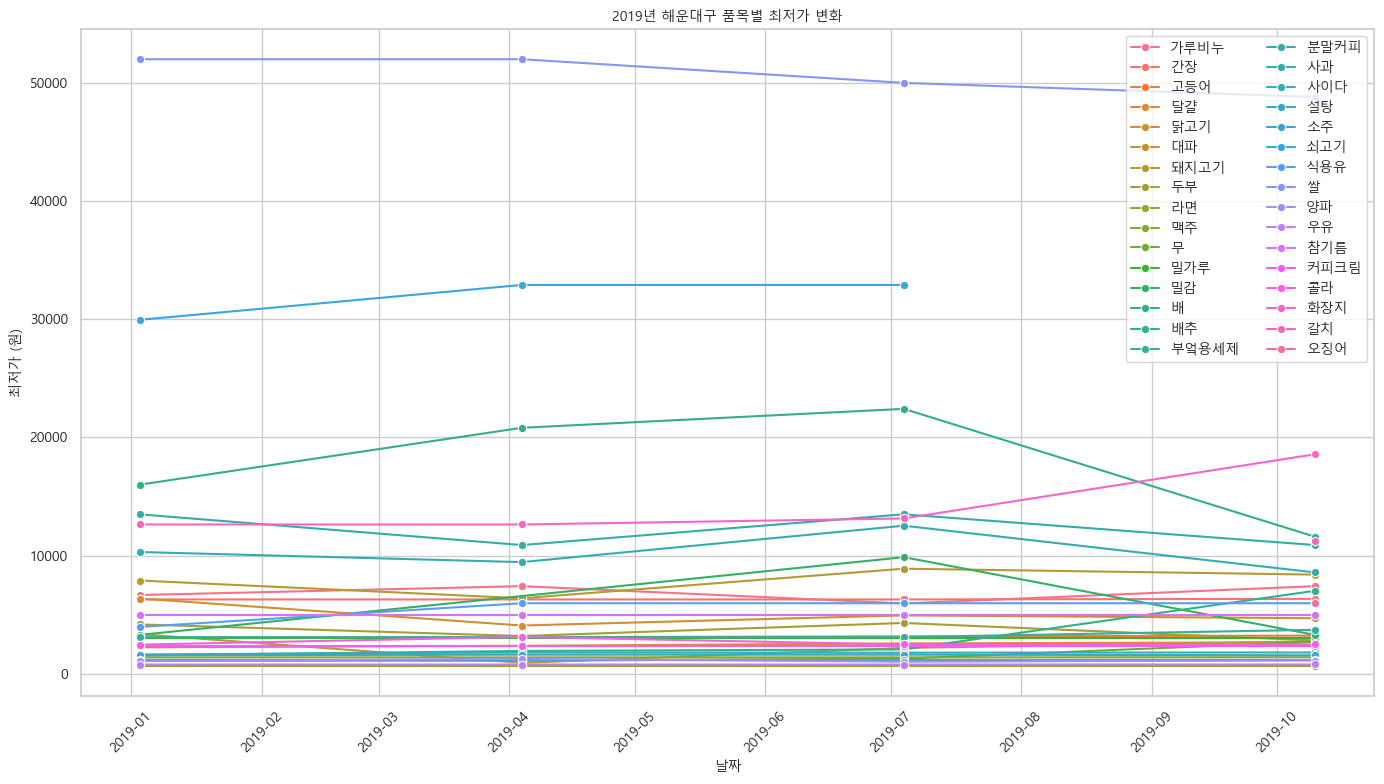

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_min.csv", index=False, encoding="utf-8-sig")

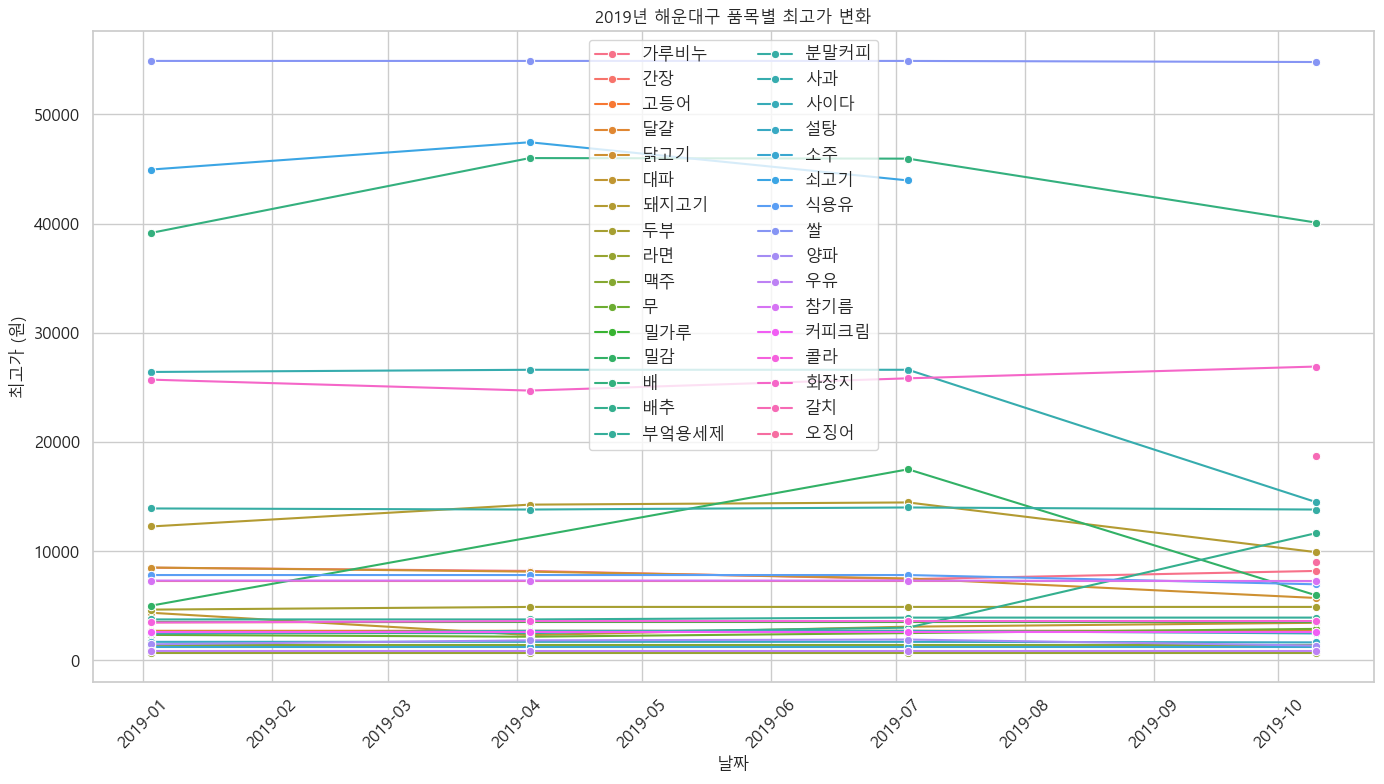

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2019_max.csv", index=False, encoding="utf-8-sig")